In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/penpen926/Library/anaconda/anaconda3/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
raw_dataset = pd.read_csv("/Users/penpen926/workspace/data/train.csv").values
np.random.shuffle(raw_dataset)
print(raw_dataset[0:10,:])
all_labels = raw_dataset[:,0]
all_features = raw_dataset[:,1:]/255
print(all_labels)
print(all_features);


[[0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
[0 2 3 ... 8 6 5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
num_examples = all_labels.size;
a,b = num_examples*8//10, num_examples*9//10;
print(a)
print(b)

33600
37800


In [15]:
dataset = {
    'train_labels':all_labels[a],
    'dev_labels':all_labels[a:b],
    'test_labels': all_labels[b:],
    
    'train_features':all_features[:a,:],
    'dev_features': all_features[a:b,:],
    'test_features':all_features[b:,:]
}
print(dataset)

{'train_labels': 8, 'dev_labels': array([8, 6, 3, ..., 5, 1, 4]), 'test_labels': array([7, 4, 2, ..., 8, 6, 5]), 'train_features': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'dev_features': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'test_features': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])}


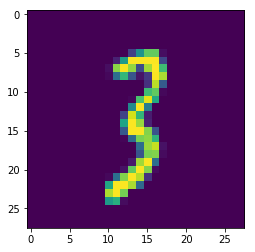

In [17]:
def plot_digit(pixels):
    plt.imshow(pixels.reshape(28,28))
    plt.show()

plot_digit(dataset['train_features'][10,:])


In [ ]:
def input_nodes(num_features, num_labels):
    X = tf.placeholder(tf.float32, name = 'X', shape = [None, num_features])
    labels = tf.placeholder(tf.int64, name ='labels', shape = [None])
    with tf.name_scope('labels_to_Y'):
        Y = tf.one_hot(labels, num_labels, name = 'Y')
    return X, labels, Y


In [ ]:
def linear_layer(input_, in_size, out_size, name):
    with tf.variable_scope(name):
        W = tf.get_variable('W', initializer = tf.contrib.layers.xavier_initializer(), shape = [out_size, in_size])
        b = tf.get_variable('b', initializer = tf.zeros_initializer(), shape = [out_size])
    return tf.matmul(input_, W, transpose_b = True)+b

In [ ]:
def relu_layer(input_, in_size, out_size, name):
    return tf.nn.relu(linear_layer(input_, in_size, out_size, name));

In [ ]:
def forward_prop(X, layers):
    for l in range(1, len(layers) - 1):
        with tf.name_scope('relu_layer' + str(l)):
            X = relu_layer(X, layers[l-1], layers[l], 'weights' + str(l))
    l = len(layers) - 1
    with tf.name_scope('linear_layer'):
        X = linear_layer(X, layers[l-1], layers[l], 'weights' + str(l))
    return X